In [1]:
# %matplotlib ipympl

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm 

In [3]:
def linregress(x, y):
    X = sm.add_constant(x, has_constant='add')
    model = sm.OLS(y, X).fit()
    return model

In [4]:
pth = '/home/user/thermal_property_calibration/synthetic_dataset_creation_new/electric_power_multivar_epwbesos/baseline/control_1/THERMAL ZONE.csv'

In [5]:
df = pd.read_csv(
    pth,
    parse_dates=['Date'],
    index_col='Date'
).resample('D').mean()

df1 = df[df['heating_rate']>0]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      548.520958
outtemp    -24.633600
dtype: float64


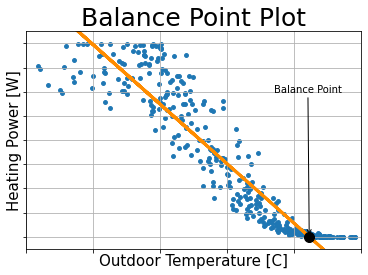

In [7]:
def plot_linregress_from_model(model, x, ax, label='Model Fit'):
    intercept = model.params[0]
    slope     = model.params[1] 
    x = np.array(x)
    plt.plot(x, intercept + slope*x, label=label, color='darkorange', linewidth=3)
    plt.plot([-intercept/slope], [0], marker='o', markersize=10, color="black")
    plt.annotate("Balance Point", xy=(-intercept/slope, 0), 
                 xytext=(17, 600), 
                 arrowprops=dict(arrowstyle="->"))

#     plt.grid()

x, y = df[['outtemp', 'total_s']], df['heating_rate']
ax = plt.scatter(x['outtemp'], y,  s=15)


x1, y1 = df1[['outtemp', 'total_s']], df1['heating_rate']
m = linregress(x1['outtemp'], y1)
print(m.params)
plot_linregress_from_model(m, x1, ax, label='Model Fit')

plt.ylim(-50,  850);
plt.xlim(-20, 30)
plt.xlabel('Outdoor Temperature [C]', fontsize=15)
plt.ylabel('Heating Power [W]', fontsize=15)
plt.grid()
plt.tick_params(labelbottom=False, labelleft=False)    
plt.title('Balance Point Plot', fontsize=25);

# 3d

In [7]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [8]:
m = linregress(x1[['outtemp', 'total_s']], y1)
intercept  = m.params[0]
outslope   = m.params[1] 
solarslope = m.params[2] 

def get_Z(x, y, outslope, solarslope, intercept):
    return intercept + x*outslope + y*solarslope

x = x1['outtemp'].to_numpy()
y = x1['total_s'].to_numpy()
X, Y = np.meshgrid(x, y)
Z = get_Z(X, Y, outslope, solarslope, intercept)

x = x1['outtemp']
y = x1['total_s']
z = df1['heating_rate'].to_numpy()


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
def plot_ax(ax, angle):
    ax.scatter(x, y, z, marker='o')
#     ax.plot_surface(X, Y, Z, cmap=cm.Oranges)
    ax.set_xlabel('Outdoor Temperature [C]', fontsize=15)
    ax.set_ylabel('Solar Gains [W]', fontsize=15)
    ax.set_zlabel('Heating Power [W]', fontsize=15)

    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.zaxis.set_major_formatter(plt.NullFormatter())

    ax.view_init(30, angle)
    ax.grid()

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
plot_ax(ax1, 65)
plt.show()

# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot(1, 1, 1, projection='3d')
# plot_ax(ax1, 20)
# plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

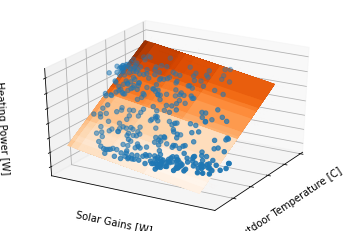

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

m = linregress(x1[['outtemp', 'total_s']], y1)
intercept  = m.params[0]
outslope   = m.params[1] 
solarslope = m.params[2] 

def get_Z(x, y, outslope, solarslope, intercept):
    return intercept + x*outslope + y*solarslope

x = x1['outtemp'].to_numpy()
y = x1['total_s'].to_numpy()
X, Y = np.meshgrid(x, y)
Z = get_Z(X, Y, outslope, solarslope, intercept)

x = x1['outtemp']
y = x1['total_s']
z = df1['heating_rate'].to_numpy()


ax.scatter(x, y, z, marker='o')
ax.plot_surface(X, Y, Z, cmap=cm.Oranges)
ax.set_xlabel('Outdoor Temperature [C]')
ax.set_ylabel('Solar Gains [W]')
ax.set_zlabel('Heating Power [W]')

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())

ax.view_init(30, 30)
ax.grid()
plt.grid()
plt.show()

(342, 342) (342, 342)


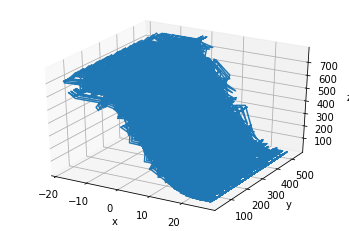

In [11]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = x1['outtemp'].to_numpy()
y = x1['total_s'].to_numpy()
z = df1['heating_rate'].to_numpy()

cols = np.unique(x).shape[0]
X = x.reshape(-1, cols)
Y = y.reshape(-1, cols)
Z = z.reshape(-1, cols)

X, Y = np.meshgrid(x, y)
Z, _ = np.meshgrid(z, z)

# zs = np.array(fun(np.ravel(X), np.ravel(Y)))
# Z = z.reshape(z.shape, -1)
# Z = z
print(X.shape, Z.shape)

# Z = f(X, Y)
# Z = df1['heating_rate'].to_numpy().reshape(-1,1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


array([[[715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        ...,
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483]],

       [[715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        [715.68579622, 788.63113127, 767.93262679, ..., 640.11792487,
         795.72357555, 796.01889483],
        ...,


In [248]:
Z.shape

(342, 342, 342)